In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv')
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
#Since there is a direct relationship between the stab and stabf column, 
#I am dropping the stab column so I can use stabf instead.
df.drop('stab', axis=1, inplace=True)

In [5]:
#defining the dependent variable and independent variables
X = df.iloc[:, :-1]
X

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391


In [6]:
y = df.iloc[:, -1]
y

0       unstable
1         stable
2       unstable
3       unstable
4       unstable
          ...   
9995    unstable
9996      stable
9997      stable
9998    unstable
9999    unstable
Name: stabf, Length: 10000, dtype: object

In [7]:
#splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
#Using the standard scaler to transform the train and the test sets.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_train_df = scaler.fit_transform(x_train)
normalized_train_df = pd.DataFrame(normalized_train_df, columns = x_train.columns)

normalized_test_df = scaler.transform(x_test)
normalized_test_df = pd.DataFrame(normalized_test_df, columns=x_test.columns)

In [10]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
RandomForest = RandomForestClassifier(random_state=1)
RandomForest.fit(normalized_train_df, y_train)
RandomForest_predicted = RandomForest.predict(normalized_test_df)
print(classification_report(y_test, RandomForest_predicted, digits=4))

              precision    recall  f1-score   support

      stable     0.9191    0.8778    0.8980       712
    unstable     0.9341    0.9573    0.9456      1288

    accuracy                         0.9290      2000
   macro avg     0.9266    0.9176    0.9218      2000
weighted avg     0.9288    0.9290    0.9286      2000



In [12]:
#extra trees classifier
from sklearn.ensemble import ExtraTreesClassifier
ExtraTree = ExtraTreesClassifier(random_state=1)
ExtraTree.fit(normalized_train_df, y_train)
ExtraTree_predicted = ExtraTree.predict(normalized_test_df)
print(classification_report(y_test, ExtraTree_pred, zero_division=True, digits=4))

              precision    recall  f1-score   support

      stable     0.9410    0.8511    0.8938       712
    unstable     0.9218    0.9705    0.9455      1288

    accuracy                         0.9280      2000
   macro avg     0.9314    0.9108    0.9197      2000
weighted avg     0.9287    0.9280    0.9271      2000



In [24]:
#Using xgboost to train an extreme boosting model 
!pip install xgboost
from xgboost import XGBClassifier
Extreme = XGBClassifier(random_state=1)
Extreme.fit(normalized_train_df, y_train)
Extreme_predicted = Extreme.predict(normalized_test_df)

[13:36:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [25]:
print(classification_report(y_test, Extreme_predicted, digits=4))

              precision    recall  f1-score   support

      stable     0.9351    0.9101    0.9224       712
    unstable     0.9510    0.9651    0.9580      1288

    accuracy                         0.9455      2000
   macro avg     0.9430    0.9376    0.9402      2000
weighted avg     0.9453    0.9455    0.9453      2000



In [26]:
#Using lightgbm to train a light gradient boosting model
!pip install lightgbm
from lightgbm import LGBMClassifier
LightGradient = LGBMClassifier(random_state=1)
LightGradient.fit(normalized_train_df, y_train)
LightGradient_predicted = LightGradient.predict(normalized_test_df)
print(classification_report(y_test, LightGradient_predicted, digits=4))

              precision    recall  f1-score   support

      stable     0.9276    0.9003    0.9138       712
    unstable     0.9458    0.9612    0.9534      1288

    accuracy                         0.9395      2000
   macro avg     0.9367    0.9307    0.9336      2000
weighted avg     0.9393    0.9395    0.9393      2000



In [27]:
#Hyperparameters

n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None] 
hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [28]:
#Randomised Search Cross Validation
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier

tree2 = ExtraTreesClassifier(random_state=1)
clf = RandomizedSearchCV(tree2, hyperparameter_grid, cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1, random_state=1)
search_result = clf.fit(normalized_train_df, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  5.7min finished


In [29]:
#checking for the best parameter for the model
search_result.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

In [30]:
#experimenting with this parameter to test the model's performance
tuned_tree = ExtraTreesClassifier(n_estimators=1000, min_samples_split=2, 
                                 min_samples_leaf=8, max_features=None, random_state=1)
tuned_tree.fit(normalized_train_df, y_train)
tuned_tree_pred = tuned_tree.predict(normalized_test_df)

In [31]:
#classification report for this hyperparameter tuning
print(classification_report(y_test, tuned_tree_pred, digits=4))

              precision    recall  f1-score   support

      stable     0.9211    0.8694    0.8945       712
    unstable     0.9300    0.9589    0.9442      1288

    accuracy                         0.9270      2000
   macro avg     0.9256    0.9141    0.9193      2000
weighted avg     0.9268    0.9270    0.9265      2000



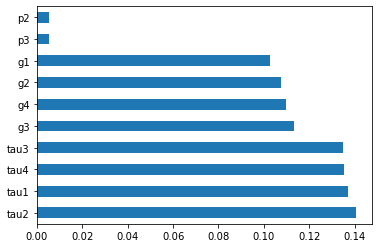

In [32]:
#feature importance
feat_importance = pd.Series(tuned_tree.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()